# Analisis Exploratorio

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Luego de la limpieza de datos se hace un analisis exploratorio sobre los dataframes recurriendo a herramientas estadísticas y de visualización y  combinando dichas herramientas comenzaremos a extraer información adicional que pueda dar respuesta a nuestro problema.

## Relación Fecha - Número de accidentes

Verificamos si existen fechas puntuales en las que existan mas ocurrencias de accidentes para poder preveer los mismos encontrando soluciones a futuro

In [74]:
combined_data = pd.read_csv('./Datasets/Data_Combinada.csv')
combined_data.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15876\2582469843.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv('./Datasets/Data_Combinada.csv')


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,numero_pasajeros,fugado
0,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,De 30 a 34 años,M,NaN,NaN,"443359,226","4472082,272",0.0,0.0,2,No
1,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,De 45 a 49 años,H,NaN,NaN,"443359,226","4472082,272",0.0,0.0,2,No
2,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,...,De 30 a 34 años,H,NaN,NaN,"441155,351","4474129,588",1.0,0.0,3,No
3,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,...,De 35 a 39 años,M,NaN,NaN,"441155,351","4474129,588",0.0,0.0,3,No
4,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Turismo,...,De 40 a 44 años,H,NaN,NaN,"441155,351","4474129,588",0.0,0.0,3,No


In [75]:
#Crear el df date_ocurrency para saber las ocurrencias por fecha
date_ocurrency = combined_data.groupby('fecha').size().reset_index(name='ocurrencia')
date_ocurrency.sort_values(by='ocurrencia', ascending=False, inplace = True)
date_ocurrency.head()

,fecha,ocurrencia
358,18/11/2022,207
319,16/12/2022,207
142,08/02/2022,206
25,02/03/2023,205
465,24/03/2023,202


Creamos un gráfico de lineas de las ocurrencias agrupadas por mes del año para facilitar la visualizacion de los datos y sacar conclusiones a traves de este

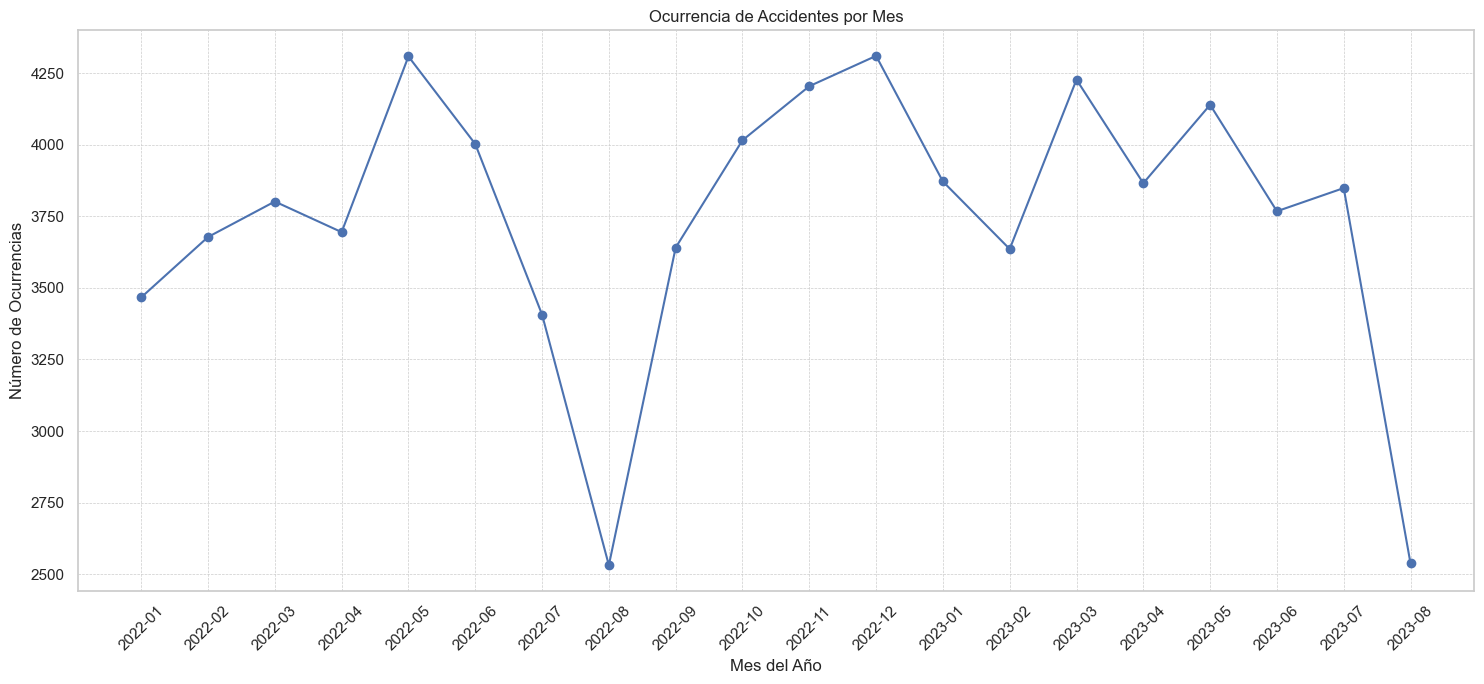

In [76]:
# Ordenar el DataFrame por fecha de forma ascendente
date_ocurrency['fecha'] = pd.to_datetime(date_ocurrency['fecha'], format='%d/%m/%Y')
date_ocurrency.sort_values(by='fecha', ascending=True, inplace=True)

# Agrupar por meses del año
date_ocurrency['year_month'] = date_ocurrency['fecha'].dt.strftime('%Y-%m')
monthly_ocurrency = date_ocurrency.groupby('year_month').sum()['ocurrencia'].reset_index()

# Generar el gráfico de líneas agrupado por meses
plt.figure(figsize=(15, 7))
plt.plot(monthly_ocurrency['year_month'], monthly_ocurrency['ocurrencia'], marker='o', linestyle='-', color='b')
plt.title('Ocurrencia de Accidentes por Mes')
plt.xlabel('Mes del Año')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

El gráfico muestra una fluctuación en la ocurrencia de accidentes mes a mes, con ciertos periodos evidenciando picos elevados. Esta variabilidad puede estar influenciada por una serie de factores, como condiciones climáticas, festividades, o eventos locales. Distinguir los meses con alta ocurrencia de accidentes es crucial para tomar medidas preventivas y mejorar la seguridad vial.

Entender las tendencias y patrones en este gráfico nos va a permitir anticipar y prepararnos mejor para futuros escenarios. Al cruzar estos datos con otros factores relevantes, se podrían identificar causas específicas detrás de los incrementos y descensos en las ocurrencias y, por lo tanto, desarrollar soluciones más efectivas.

## Siguiendo con el análisis exploratorio contamos por distrito la cantidad de ocurrencias por mes y año

In [77]:
# Extrayendo año y mes de la columna 'fecha' y creando una nueva columna 'year_month' sin modificar el dataframe original
year_month = pd.to_datetime(combined_data['fecha'], dayfirst=True).dt.to_period('M')

# Agrupando por 'year_month' y 'distrito' para contar las ocurrencias
grouped_data = combined_data.groupby([year_month, 'distrito']).size().unstack().fillna(0)

grouped_data.head()

distrito,ARGANZUELA,BARAJAS,CARABANCHEL,CENTRO,CHAMARTÍN,CHAMBERÍ,CIUDAD LINEAL,FUENCARRAL-EL PARDO,HORTALEZA,LATINA,...,MORATALAZ,PUENTE DE VALLECAS,RETIRO,SALAMANCA,SAN BLAS-CANILLEJAS,TETUÁN,USERA,VICÁLVARO,VILLA DE VALLECAS,VILLAVERDE
fecha,,,,,,,,,,,,,,,,,,,,,
2022-01,128,65,212,151,203,178,234,186,144,181,...,85,303,151,299,198,143,184,54,61,137
2022-02,149,64,213,194,246,171,228,211,173,214,...,95,270,159,236,161,183,172,78,90,119
2022-03,200,60,236,201,266,178,259,213,136,164,...,97,294,170,299,224,146,164,55,101,123
2022-04,161,60,244,231,335,186,238,173,129,191,...,83,294,176,220,170,180,126,62,87,101
2022-05,186,83,218,221,391,246,295,225,180,201,...,125,344,188,312,240,148,176,65,111,120


Ahora que hemos agrupado los datos por year_month y distrito y contado las ocurrencias, podemos proceder a crear un gráfico de barras sobrepuestas que muestra la distribución de ocurrencias por distrito a lo largo de los meses por año y visualizar si existe alg.

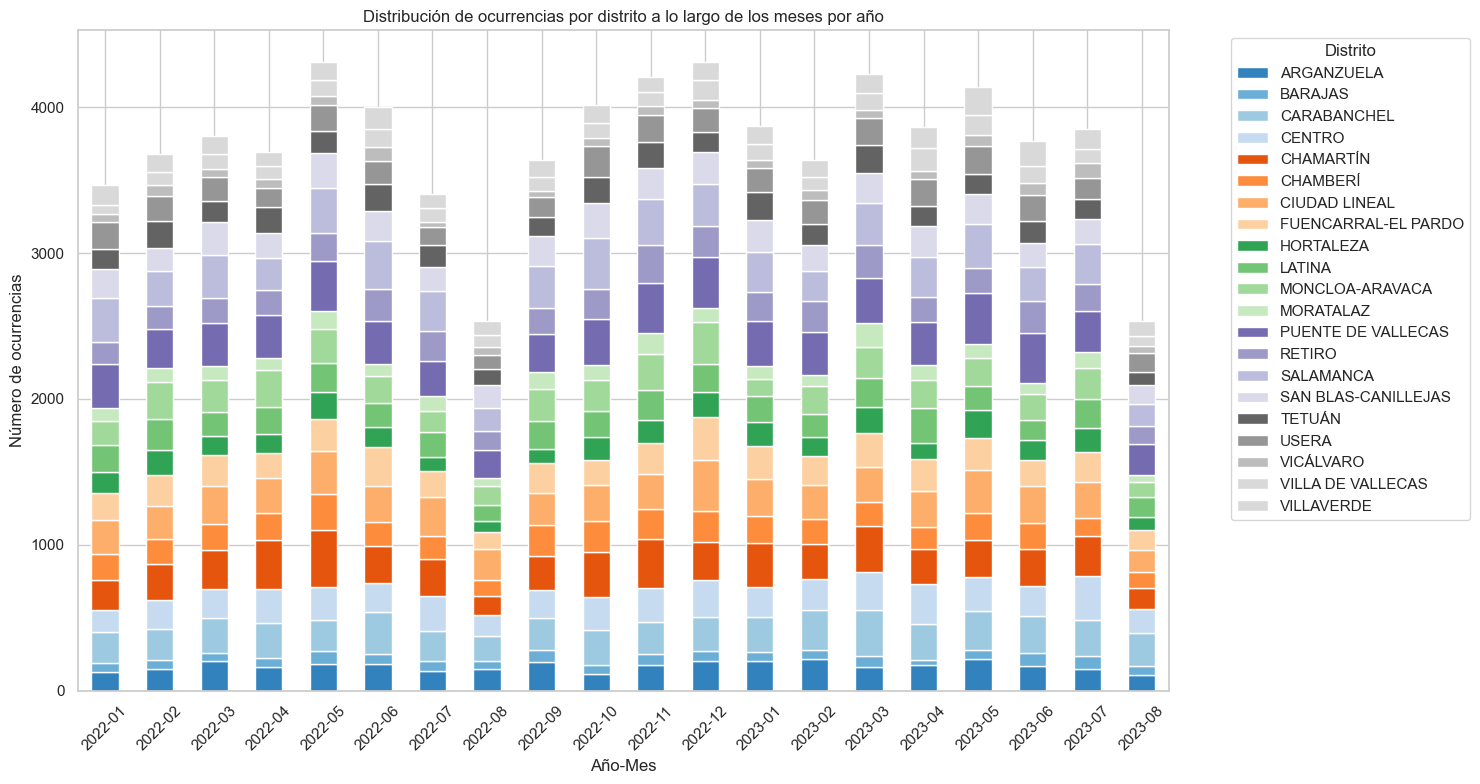

In [78]:
# Creando el gráfico de barras sobrepuestas
fig, ax = plt.subplots(figsize=(15, 8))


grouped_data.plot(kind='bar', stacked=True, ax=ax, colormap='tab20c')
plt.title('Distribución de ocurrencias por distrito a lo largo de los meses por año')
plt.ylabel('Número de ocurrencias')
plt.xlabel('Año-Mes')
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotando las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Análisis del Gráfico de Barras por Distrito
* **Distribución de Ocurrencias**: Algunos distritos presentan una mayor cantidad de ocurrencias que otros. Esto podría indicar áreas con mayor tráfico vehicular o puntos críticos que requieren atención.
* **Variabilidad Temporal**: Existen variaciones mensuales en las ocurrencias por distrito que podrían estar influenciadas por factores estacionales como condiciones meteorológicas, períodos vacacionales, o eventos locales.
* **Picos y Valles**: Los picos específicos en ciertos distritos pueden sugerir eventos o cambios temporales en el tráfico, como obras en carreteras, mientras que los valles podrían indicar períodos de menor actividad, como pueden ser las restricciones de tráfico.

## Conclusión General Ocurrencias
Los dos gráficos proporcionan perspectivas valiosas sobre las ocurrencias de accidentes. El gráfico de líneas es útil para comprender la tendencia general y los patrones estacionales de los accidentes a nivel de toda la ciudad. En cambio, el gráfico de barras sobrepuestas destaca las diferencias entre los distritos y puede ser clave para las intervenciones y políticas locales más dirigidas. La combinación de ambos enfoques puede ayudar a las autoridades a diseñar estrategias de prevención de accidentes más efectivas, dirigidas tanto a áreas específicas como a la ciudad en general.

# Verificamos si afecta el numero de pasajeros en un choque
### De esta manera sabremos si podemos quitarnos los datos de los pasajeros

1. fusionar nuestra serie pasajeros_por_accidente con el DataFrame combined_data para tener el número de pasajeros junto con los demás datos

In [79]:
# Explorar la relación entre el número de pasajeros y el tipo de accidente
relacion_pasajeros_tipo = combined_data.groupby(['tipo_accidente', 'numero_pasajeros']).size().unstack().fillna(0)

# Mostrar la relación
relacion_pasajeros_tipo

numero_pasajeros,1,2,3,4,5,6,7,8,9,10,11,14,15,17,21
tipo_accidente,,,,,,,,,,,,,,,
Alcance,113.0,8692.0,4449.0,2332.0,1285.0,438.0,287.0,56.0,27.0,10.0,0.0,0.0,0.0,0.0,0.0
Atropello a animal,111.0,30.0,15.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Atropello a persona,0.0,3636.0,1194.0,284.0,100.0,18.0,14.0,8.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
Caída,2179.0,1566.0,426.0,116.0,45.0,36.0,35.0,0.0,9.0,10.0,11.0,0.0,0.0,0.0,0.0
Choque contra obstáculo fijo,2549.0,3862.0,1227.0,400.0,130.0,60.0,7.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
Colisión frontal,23.0,1022.0,471.0,240.0,95.0,54.0,21.0,16.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
Colisión fronto-lateral,154.0,10180.0,4887.0,2392.0,955.0,504.0,147.0,56.0,27.0,20.0,11.0,14.0,0.0,17.0,21.0
Colisión lateral,94.0,7302.0,2511.0,940.0,355.0,132.0,77.0,24.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0
Colisión múltiple,39.0,370.0,1449.0,1136.0,725.0,348.0,224.0,136.0,72.0,50.0,11.0,0.0,0.0,0.0,0.0


Observamos que no tiene mucha relacion el tipo de accidente con el numero de pasajeros, más que la mayoría de los accidentes involucran vehículos sin pasajeros o con un número limitado de pasajeros.

## Verificamos con la gravedad del accidente (lesividad)

1. Calculamos la proporción de accidentes con distintos niveles de lesividad en función del número de pasajeros

In [80]:
proporcion_lesividad = combined_data.groupby(['numero_pasajeros', 'lesividad']).size().unstack().fillna(0)
proporcion_lesividad = proporcion_lesividad.div(proporcion_lesividad.sum(axis=1), axis=0)  # Convertir a proporciones

# Visualizar las proporciones
proporcion_lesividad

lesividad,Asistencia sanitaria ambulatoria con posterioridad,Asistencia sanitaria inmediata en centro de salud o mutua,Asistencia sanitaria sólo en el lugar del accidente,Atención en urgencias sin posterior ingreso,Fallecido 24 horas,Ingreso inferior o igual a 24 horas,Ingreso superior a 24 horas,Se desconoce,Sin asistencia sanitaria
numero_pasajeros,,,,,,,,,
1,0.052505,0.108442,0.326356,0.149279,0.003432,0.159574,0.033631,0.000000,0.166781
2,0.022369,0.046313,0.242860,0.058530,0.000706,0.076556,0.025138,0.000054,0.527473
3,0.018502,0.031819,0.223442,0.044729,0.000407,0.063841,0.019518,0.000102,0.597642
4,0.018773,0.027453,0.214372,0.038151,0.001009,0.056318,0.014736,0.000000,0.629189
5,0.016142,0.021937,0.237583,0.028974,0.002070,0.054222,0.010762,0.000414,0.627897
6,0.014783,0.024348,0.222609,0.040870,0.000000,0.049565,0.003478,0.000000,0.644348
7,0.013180,0.014827,0.250412,0.041186,0.001647,0.037891,0.004942,0.000000,0.635914
8,0.008264,0.012397,0.177686,0.033058,0.000000,0.041322,0.004132,0.000000,0.723140
9,0.033898,0.000000,0.279661,0.016949,0.000000,0.025424,0.033898,0.000000,0.610169


Observamos que en accidentes sin pasajeros o con un número limitado de pasajeros, la proporción de accidentes donde no se requiere asistencia sanitaria (columna "Sin asistencia sanitaria") tiende a ser más alta.

2. Para obtener una imagen más clara, podemos visualizar estos datos. Un gráfico de áreas apiladas será útil para visualizar la distribución de niveles de lesividad en función del número de pasajeros.

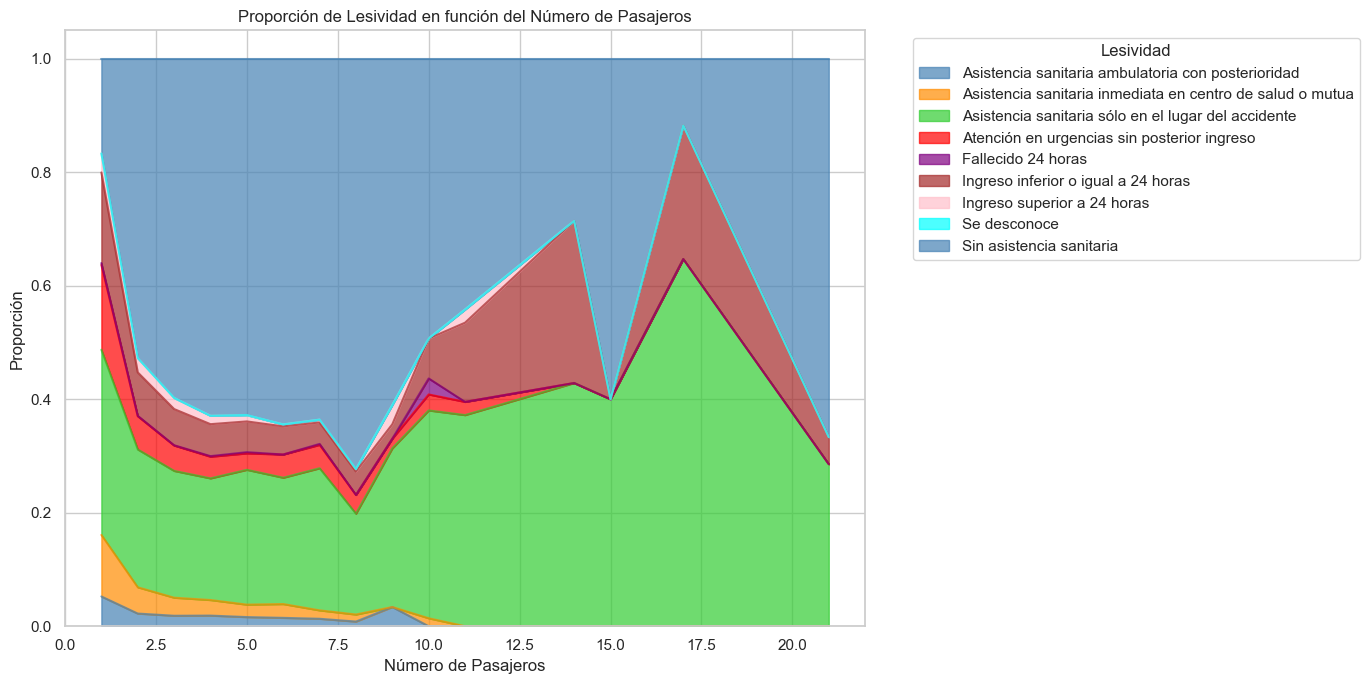

In [81]:
colors = ['steelblue', 'darkorange', 'limegreen', 'red', 'purple', 'brown', 'pink', 'cyan']

# Gráfico de barras apiladas
#proporcion_lesividad.plot(kind='bar', stacked=True, figsize=(14,7), color=colors)
#plt.title('Proporción de Lesividad en función del Número de Pasajeros')
#plt.xlabel('Número de Pasajeros')
#plt.ylabel('Proporción')
#plt.legend(title='Lesividad', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()
#plt.show()

# Gráfico de áreas apiladas
fig, ax = plt.subplots(figsize=(14,7))
proporcion_lesividad.plot(kind='area', stacked=True, ax=ax, color=colors, alpha=0.7)
ax.set_title('Proporción de Lesividad en función del Número de Pasajeros')
ax.set_xlabel('Número de Pasajeros')
ax.set_ylabel('Proporción')
ax.legend(title='Lesividad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Del Gráfico podemos sacar varias conclusiones:
1. La mayoría de los accidentes, independientemente del número de pasajeros, caen en la categoría "Sin asistencia sanitaria", lo que indica que estos accidentes no resultaron en lesiones que requirieran atención médica.
2. Para accidentes con un número más alto de pasajeros (por ejemplo, 12, 14 y 18 pasajeros), aunque el tamaño de la muestra es pequeño, parece haber una proporción mayor de accidentes en la categoría "Sin asistencia sanitaria" en comparación con los accidentes con menos pasajeros.
3. Las proporciones de otras categorías de lesividad varían, pero no se observa un patrón claro en relación con el número de pasajeros.
En general, basándonos en este análisis visual, no parece que el número de pasajeros tenga una influencia fuerte y clara en la gravedad del accidente, al menos en términos de lesividad.

# Estudio de Momento del día y condición meteorológica
Analizamos cómo la combinación de estos dos factores influye en la frecuencia de los accidentes. Específicamente, buscamos determinar si ciertas condiciones meteorológicas, como días despejados o lluviosos, tenían diferentes impactos en la ocurrencia de accidentes durante distintos momentos del día (mañana, tarde, noche). Este análisis ayudaría a identificar patrones y posibles correlaciones entre el momento del día y las condiciones del clima

Identificamos y comprender las columnas 'hora' y el 'estado meteorológico'.

In [82]:
# Revisar los valores únicos en las columnas relevantes: 'hora' y 'estado_meteorológico'
unique_hours = combined_data['hora'].unique()
unique_weather_conditions = combined_data['estado_meteorológico'].unique()
unique_hours, unique_weather_conditions

(array(['1:30:00', '0:30:00', '1:50:00', ..., '4:34:00', '1:51:00',
        '7:04:00'], dtype=object),
 array(['Despejado', nan, 'Se desconoce', 'Lluvia débil', 'Nublado',
        'LLuvia intensa', 'Granizando', 'Nevando'], dtype=object))

Agrupamos los datos según las nuevas categorías de hora y estado meteorológico. Luego calculamos la frecuencia de los accidentes para cada combinación de estas dos variables.

In [83]:
# Función para categorizar la hora del día
def categorize_hour(time_str):
    if not pd.isnull(time_str):
        hour = int(time_str.split(':')[0])
        if 5 <= hour < 12:
            return 'Mañana'
        elif 12 <= hour < 18:
            return 'Tarde'
        else:
            return 'Noche'
    else:
        return 'Desconocido'

# Aplicar la función a la columna 'hora'
combined_data['categoria_hora'] = combined_data['hora'].apply(categorize_hour)

# Manejar los valores nulos y desconocidos en 'estado_meteorológico'
combined_data['estado_meteorológico'] = combined_data['estado_meteorológico'].fillna('Desconocido')

# Contar la frecuencia de accidentes por combinación de categoría de hora y estado meteorológico
accident_frequency = combined_data.groupby(['categoria_hora', 'estado_meteorológico']).size().unstack(fill_value=0)

accident_frequency

estado_meteorológico,Desconocido,Despejado,Granizando,LLuvia intensa,Lluvia débil,Nevando,Nublado,Se desconoce
categoria_hora,,,,,,,,
Mañana,1520,13572,0,198,938,3,1293,125
Noche,3723,22018,10,471,1953,1,1736,232
Tarde,2976,21080,3,288,1093,2,1624,102


Creamos una visualización gráfica para interpretar de manera más sencilla y efectiva los resultados del análisis de frecuencia.

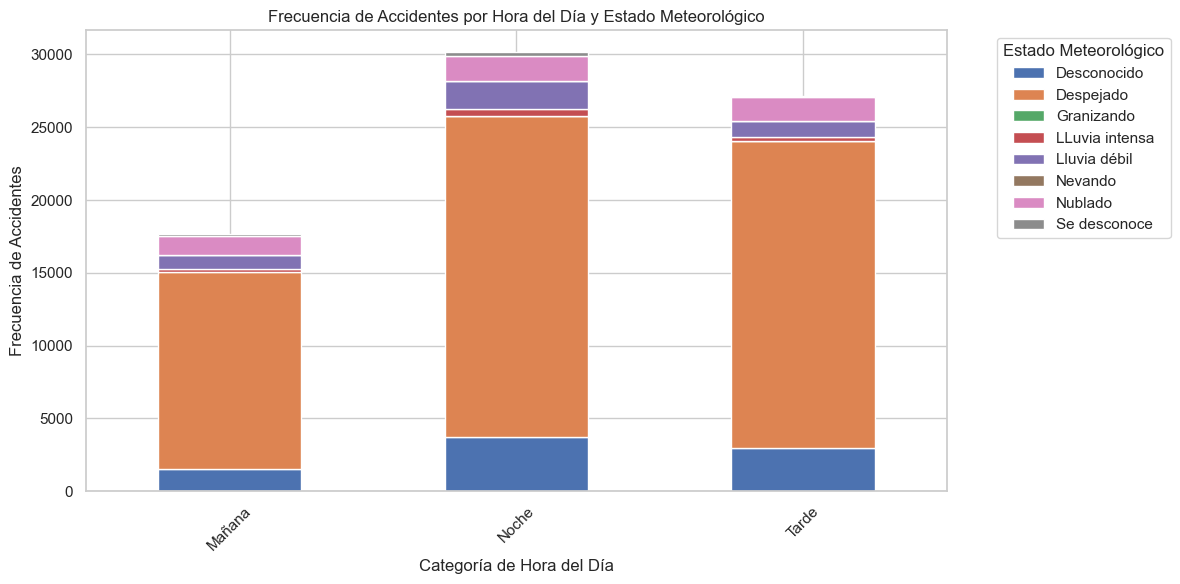

In [84]:
import seaborn as sns

# Configuración de estilo de gráfico
sns.set(style="whitegrid")

# Crear un gráfico de barras apiladas
accident_frequency.plot(kind='bar', stacked=True, figsize=(12, 6))

# Título y etiquetas
plt.title('Frecuencia de Accidentes por Hora del Día y Estado Meteorológico')
plt.xlabel('Categoría de Hora del Día')
plt.ylabel('Frecuencia de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Estado Meteorológico', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Al observar el gráfico de barras apiladas, concluimos que la mayoría de los accidentes ocurren durante la noche, especialmente en condiciones meteorológicas despejadas (debido a que mayor parte del tiempo está despejado, por lo que aumenta su frecuencia). También notamos un aumento significativo en la frecuencia de accidentes bajo lluvia débil durante las horas nocturnas. Esta tendencia sugiere que, aunque las condiciones despejadas son las más comunes para accidentes en todos los momentos del día, la lluvia débil parece ser un factor de riesgo particularmente importante durante la noche. Nuestro estudio resalta la importancia de considerar la interacción entre la hora del día y las condiciones meteorológicas al evaluar los riesgos de accidentes.

# Distribución de las edades de las personas involucradas en distintos tipos de accidentes.

1. Transformamos los rangos de edad en marcas de clase (valores numéricos medios) para permitir cálculos estadísticos.
2. Agrupar los datos por tipo de accidente y calcular los percentiles para entender la distribución de la edad dentro de cada categoría de accidente.

In [85]:
# Crear un diccionario para mapear los rangos de edad a marcas de clase (valor medio)
age_range_to_midpoint = {
    'Menor de 5 años': 2.5,
    'De 6 a 9 años': 7.5,
    'De 10 a 14 años': 12.5,
    'De 15 a 17 años': 16,
    'De 18 a 20 años': 19,
    'De 21 a 24 años': 22.5,
    'De 25 a 29 años': 27,
    'De 30 a 34 años': 32,
    'De 35 a 39 años': 37,
    'De 40 a 44 años': 42,
    'De 45 a 49 años': 47,
    'De 50 a 54 años': 52,
    'De 55 a 59 años': 57,
    'De 60 a 64 años': 62,
    'De 65 a 69 años': 67,
    'De 70 a 74 años': 72,
    'Más de 74 años': 77,
    'Desconocido': np.nan  # Asignar NaN para los rangos de edad desconocidos
}

# Convertir los rangos de edad a marcas de clase
combined_data['marca_clase_edad'] = combined_data['rango_edad'].map(age_range_to_midpoint)

# Agrupar los datos por tipo de accidente y calcular los percentiles de edad
percentiles_age_by_accident_type = combined_data.groupby('tipo_accidente')['marca_clase_edad'].describe(percentiles=[.25, .5, .75])

percentiles_age_by_accident_type

,count,mean,std,min,25%,50%,75%,max
tipo_accidente,,,,,,,,
Alcance,16894.0,40.588079,15.014567,2.5,27.0,42.0,52.0,77.0
Atropello a animal,152.0,43.881579,14.313743,2.5,32.0,42.0,52.0,77.0
Atropello a persona,4969.0,43.699034,19.378701,2.5,27.0,42.0,57.0,77.0
Caída,4298.0,38.496859,14.336758,2.5,27.0,37.0,47.0,77.0
Choque contra obstáculo fijo,5893.0,40.396233,15.324864,2.5,27.0,42.0,52.0,77.0
Colisión frontal,1790.0,40.871788,15.219538,2.5,27.0,42.0,52.0,77.0
Colisión fronto-lateral,18357.0,40.539140,15.404111,2.5,27.0,42.0,52.0,77.0
Colisión lateral,10482.0,42.643246,14.474836,2.5,32.0,42.0,52.0,77.0
Colisión múltiple,3965.0,41.477806,15.382169,2.5,32.0,42.0,52.0,77.0


Creamos una visualización gráfica para interpretar de manera clara y efectiva la distribución de edades por tipo de accidente.

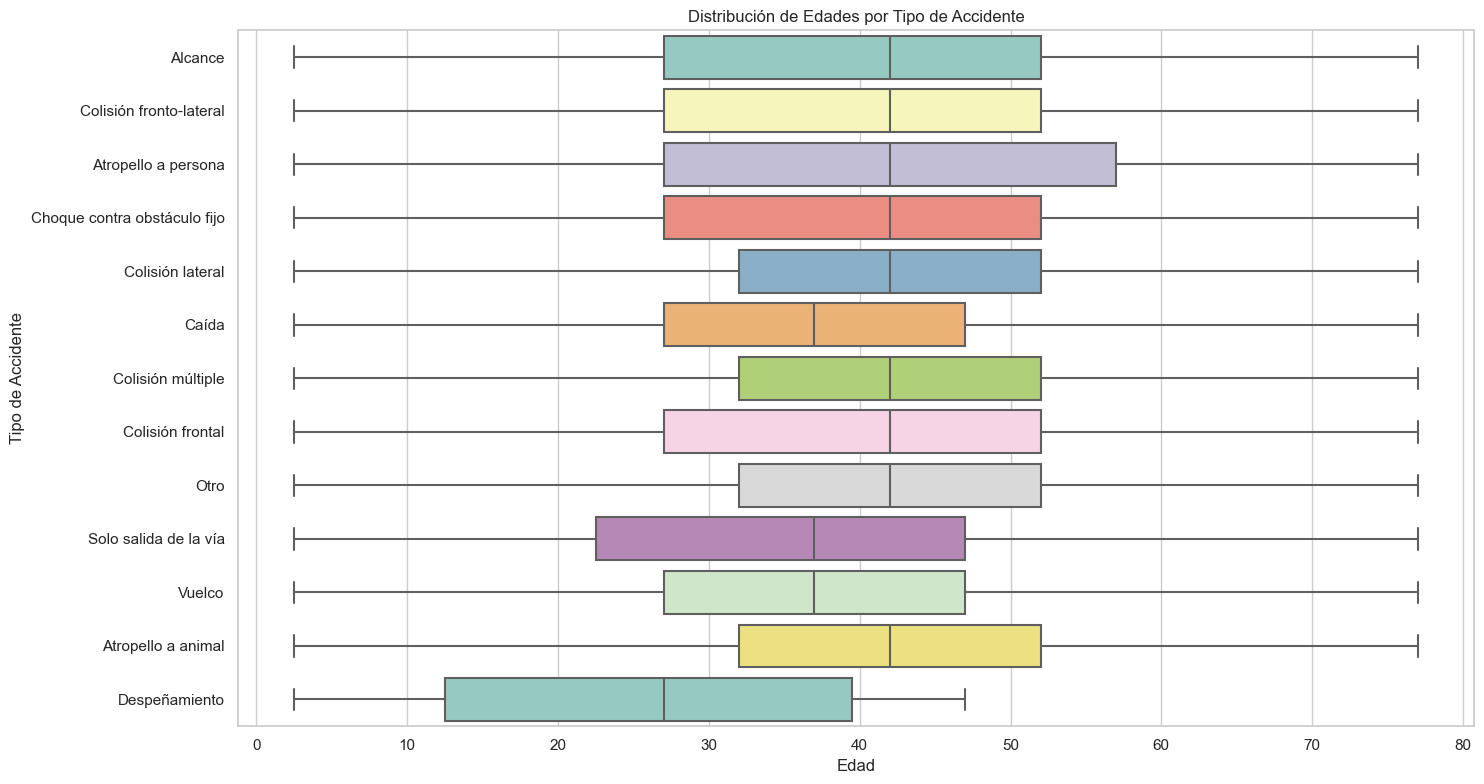

In [88]:
# Crear un gráfico de caja para visualizar la distribución de edades por tipo de accidente
plt.figure(figsize=(15, 8))
sns.boxplot(x='marca_clase_edad', y='tipo_accidente', data=combined_data, palette="Set3")

# Título y etiquetas
plt.title('Distribución de Edades por Tipo de Accidente')
plt.xlabel('Edad')
plt.ylabel('Tipo de Accidente')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El gráfico de caja que hemos creado revela diferencias significativas en la distribución de edades entre los distintos tipos de accidentes. Se observa que algunos tipos de accidentes, como los atropellos a personas, presentan una distribución de edades más amplia y una mediana más alta, lo que indica una mayor participación de individuos de edad avanzada en estos accidentes. Por otro lado, otros tipos de accidentes muestran una concentración más estrecha de edades, sugiriendo un grupo objetivo específico más susceptible

Del análisis de los datos de accidentes, centrado en la relación entre la edad de los individuos involucrados y los tipos de accidentes, se puede resumir en los siguientes puntos clave:

1. Diversidad en la Distribución de Edades: Observamos una variabilidad significativa en la distribución de edades entre los distintos tipos de accidentes. Esto indica que ciertos tipos de accidentes son más propensos a involucrar a grupos de edad específicos.

2. Mayor Involucramiento de Edades Avanzadas en Algunos Accidentes: En particular, tipos de accidentes como atropellos a personas mostraron una mayor participación de individuos de mayor edad, lo cual se evidenció por una mediana de edad más alta y un rango más amplio en la distribución de edades.

3. Concentración de Grupos de Edad en Accidentes Específicos: Algunos tipos de accidentes tenían una distribución de edades más concentrada, sugiriendo que ciertos grupos de edad son más susceptibles a estos accidentes específicos.

4. Importancia para la Prevención y Seguridad: Estos hallazgos son cruciales para diseñar estrategias de prevención y seguridad vial que sean específicas para diferentes grupos de edad, especialmente para aquellos más vulnerables a ciertos tipos de accidentes.

# Relación entre la ubicación de los accidentes (distritos específicos) y los tipos de accidentes que ocurren en esos lugares
Determinamos las categorías únicas existentes en las columnas 'distrito' y 'tipo_accidente' para comprender la variedad de datos con los que trabajaríamos.

In [89]:
# Revisar los valores únicos para las columnas 'distrito' y 'tipo_accidente'
unique_districts = combined_data['distrito'].unique()
unique_accident_types = combined_data['tipo_accidente'].unique()

unique_districts, unique_accident_types

(array(['PUENTE DE VALLECAS', 'RETIRO', 'CENTRO', 'SAN BLAS-CANILLEJAS',
        'USERA', 'CHAMBERÍ', 'MORATALAZ', 'LATINA', 'HORTALEZA',
        'ARGANZUELA', 'CARABANCHEL', 'TETUÁN', 'CIUDAD LINEAL',
        'VILLAVERDE', 'SALAMANCA', 'VICÁLVARO', 'FUENCARRAL-EL PARDO',
        'VILLA DE VALLECAS', 'CHAMARTÍN', 'MONCLOA-ARAVACA', 'BARAJAS'],
       dtype=object),
 array(['Alcance', 'Colisión fronto-lateral', 'Atropello a persona',
        'Choque contra obstáculo fijo', 'Colisión lateral', 'Caída',
        'Colisión múltiple', 'Colisión frontal', 'Otro',
        'Solo salida de la vía', 'Vuelco', 'Atropello a animal',
        'Despeñamiento'], dtype=object))

Normalizamos los datos para que las diferencias en el número total de accidentes por distrito no afecten el análisis y visualizar la relación mediante un mapa de calor.

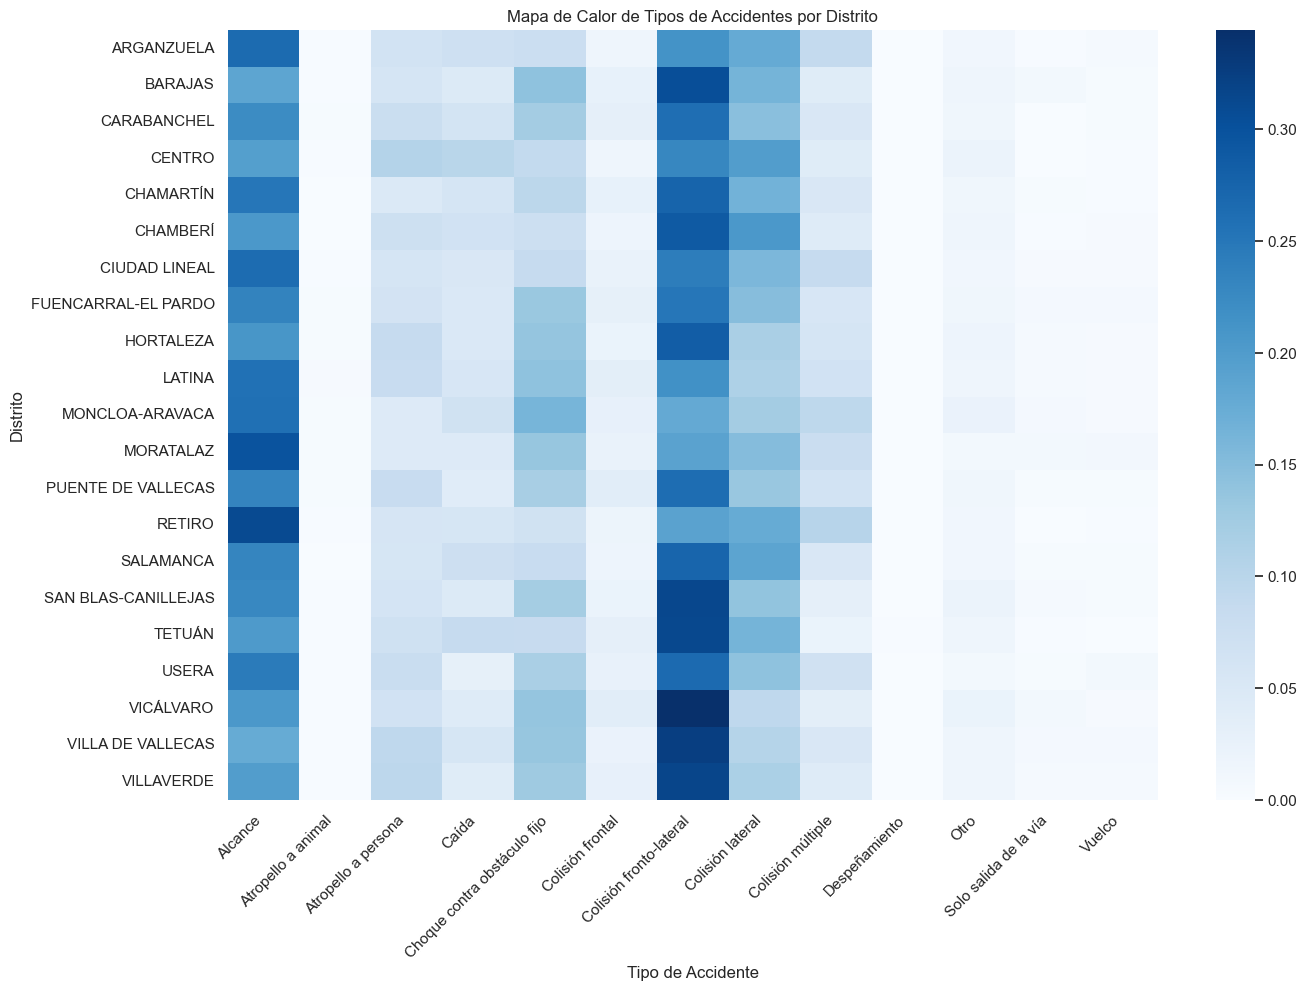

In [90]:
# Crear una tabla cruzada (crosstab) para contar la frecuencia de tipos de accidente por distrito
accident_type_by_district = pd.crosstab(combined_data['distrito'], combined_data['tipo_accidente'])

# Normalizar los datos para que las diferencias en el número total de accidentes por distrito no sesguen los resultados
accident_type_by_district_normalized = accident_type_by_district.div(accident_type_by_district.sum(axis=1), axis=0)

# Crear el mapa de calor con una paleta de colores adecuada para ambos modos (oscuro y claro)
plt.figure(figsize=(15, 10))
sns.heatmap(accident_type_by_district_normalized, annot=False, cmap='Blues')

# Título y etiquetas
plt.title('Mapa de Calor de Tipos de Accidentes por Distrito')
plt.xlabel('Tipo de Accidente')
plt.ylabel('Distrito')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

El mapa de calor que hemos creado muestra la frecuencia relativa de diferentes tipos de accidentes en cada distrito. A través de los gradientes de color, podemos observar patrones interesantes:

* **Patrones de Frecuencia**: Algunos distritos presentan una mayor frecuencia de ciertos tipos de accidentes en comparación con otros. Por ejemplo, un distrito puede mostrar una mayor incidencia de "Alcances" o "Colisiones laterales" en comparación con otros tipos de accidentes.

* **Distribución Geográfica**: La distribución de los tipos de accidentes no es uniforme a través de los distritos, indicando posibles factores geográficos o urbanísticos que influyen en el tipo de accidentes más comunes en cada área.

* **Detección de Hotspots**: El mapa ayuda a identificar 'hotspots' o áreas donde ciertos tipos de accidentes son particularmente frecuentes. Estos puntos calientes podrían requerir atención especial en términos de seguridad vial o medidas preventivas.

Este tipo de visualización es útil para una variedad de aplicaciones, especialmente en la planificación urbana, la gestión de la seguridad vial y en la toma de decisiones políticas:

* **Planificación Urbana y Mejoras en la Infraestructura**: Identificar áreas con alta incidencia de ciertos tipos de accidentes puede indicar la necesidad de mejoras en la infraestructura, como señalización mejorada, cambios en el diseño de las carreteras, o la implementación de medidas de calmado de tráfico.

* **Enfoque en la Seguridad Vial**: Permite a las autoridades locales y a las organizaciones de seguridad vial centrarse en áreas y tipos de accidentes específicos para campañas de concienciación y educación.

* **Asignación de Recursos**: Ayuda a los servicios de emergencia y a los planificadores urbanos a asignar recursos y servicios de manera más eficiente, concentrándose en las áreas con mayor frecuencia de tipos específicos de accidentes.

### Mapa de accidentes por distrito

Las columnas de coordenadas coordenada_x_utm y coordenada_y_utm están presentes en todos los registros, pero están en formato de objeto (probablemente debido a la presencia de comas como separadores decimales). Necesitamos convertir estas columnas a un formato numérico adecuado para poder utilizarlas en un mapa.

Realizamos la conversión de estas coordenadas y luego procederé a crear un mapa que muestre los accidentes por distrito.

In [91]:
# Checking the data types and missing values in the coordinate columns
coord_columns_info = combined_data[['coordenada_x_utm', 'coordenada_y_utm']].info()

# Displaying the first few non-null coordinate values to understand their format
sample_coords = combined_data.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm']).head()[['coordenada_x_utm', 'coordenada_y_utm']]
sample_coords

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74961 entries, 0 to 74960
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coordenada_x_utm  74961 non-null  object
 1   coordenada_y_utm  74961 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


,coordenada_x_utm,coordenada_y_utm
0,"443359,226","4472082,272"
1,"443359,226","4472082,272"
2,"441155,351","4474129,588"
3,"441155,351","4474129,588"
4,"441155,351","4474129,588"


In [92]:
# Reemplazamos comas con puntos y convertimos coordenadas a numérico
combined_data['coordenada_x_utm'] = pd.to_numeric(combined_data['coordenada_x_utm'].str.replace(',', '.'))
combined_data['coordenada_y_utm'] = pd.to_numeric(combined_data['coordenada_y_utm'].str.replace(',', '.'))

# Check
combined_data[['coordenada_x_utm', 'coordenada_y_utm']].info()

ValueError: Unable to parse string "#¡VALOR!" at position 757

Parece que hay un problema con la conversión de las coordenadas a formato numérico. Algunas entradas en las columnas de coordenadas contienen valores no numéricos, como "#¡VALOR!", lo que está causando un error.
Limpiamos los datos eliminando o reemplazando estos valores no numéricos. Luego intentaré nuevamente convertir las coordenadas a formato numérico. Vamos a proceder con este enfoque.

In [93]:
# Cleaning non-numeric values in coordinate columns
combined_data['coordenada_x_utm'] = pd.to_numeric(combined_data['coordenada_x_utm'].replace(',', '.').replace('#¡VALOR!', np.nan), errors='coerce')
combined_data['coordenada_y_utm'] = pd.to_numeric(combined_data['coordenada_y_utm'].replace(',', '.').replace('#¡VALOR!', np.nan), errors='coerce')

# Check if the conversion was successful and count non-null values
converted_coords_info = combined_data[['coordenada_x_utm', 'coordenada_y_utm']].info()
non_null_coords_count = combined_data[['coordenada_x_utm', 'coordenada_y_utm']].notnull().sum()

converted_coords_info, non_null_coords_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74961 entries, 0 to 74960
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coordenada_x_utm  29942 non-null  float64
 1   coordenada_y_utm  29931 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


(None,
 coordenada_x_utm    29942
 coordenada_y_utm    29931
 dtype: int64)

Para el mapa, utilizaremos las coordenadas UTM (Universal Transverse Mercator), que son adecuadas para representar datos a nivel local o regional. Vamos a crear un mapa que muestre la distribución de los accidentes en estos distritos

In [94]:
import geopandas as gpd

# Converting the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(combined_data, geometry=gpd.points_from_xy(combined_data.coordenada_x_utm, combined_data.coordenada_y_utm))

# Setting the coordinate system to UTM (assuming the data is in a UTM zone appropriate for the location)
gdf.set_crs(epsg=25830, inplace=True)

# Convert to geographic coordinates (longitude, latitude) for mapping
gdf = gdf.to_crs(epsg=4326)

# Plotting the data
plt.figure(figsize=(10, 10))
gdf.plot(markersize=1, color='blue')
plt.title('Mapa de Accidentes por Distrito')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

CRSError: Invalid projection: epsg:25830: (Internal Proj Error: proj_create: SQLite error on SELECT name, coordinate_system_auth_name, coordinate_system_code, geodetic_crs_auth_name, geodetic_crs_code, conversion_auth_name, conversion_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM projected_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

# Buscamos el estado meteorológico por fecha y hora para reemplazar los valores nulos de esta columna

Iniciamos verificando los tipos de datos que hay en la columna estado meteorológico para saber los valores a reemplazar

In [ ]:
combined_data['estado_meteorológico'].value_counts()

Cuando el valor sea desconocido los convertimos a nulo para reemplazarlos con los nulos, ya que esto no nos aporta información adicional

In [ ]:
combined_data.loc[combined_data['estado_meteorológico'] == 'Se desconoce'] = None
combined_data['estado_meteorológico'].value_counts()

In [25]:
weather_data_sep23 = pd.read_csv('./Datasets/sep_meteo23.csv', sep = ';')
weather_data_sep23.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2023,9,1,1.23,V,...,2.37,V,2.18,V,1.45,V,0.57,V,0.72,V
1,28,79,102,81,28079102_81_98,2023,9,2,0.65,V,...,3.53,V,3.28,V,3.48,V,2.42,V,1.92,V
2,28,79,102,81,28079102_81_98,2023,9,3,1.77,V,...,3.47,V,3.53,V,3.27,V,5.03,V,3.58,V
3,28,79,102,81,28079102_81_98,2023,9,4,2.13,V,...,1.03,V,1.25,V,1.52,V,1.08,V,1.87,V
4,28,79,102,81,28079102_81_98,2023,9,5,1.42,V,...,0.83,V,0.35,V,0.53,V,0.83,V,1.15,V


Limpiamos las filas duplicadas o filas completamente nulas las eliminamos para evitar tener datos repetidos

In [24]:
weather_data_sep23.drop_duplicates(inplace=True)
weather_data_sep23.dropna(how='all', inplace=True)
weather_data_sep23

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2023,9,1,1.23,V,...,2.37,V,2.18,V,1.45,V,0.57,V,0.72,V
1,28,79,102,81,28079102_81_98,2023,9,2,0.65,V,...,3.53,V,3.28,V,3.48,V,2.42,V,1.92,V
2,28,79,102,81,28079102_81_98,2023,9,3,1.77,V,...,3.47,V,3.53,V,3.27,V,5.03,V,3.58,V
3,28,79,102,81,28079102_81_98,2023,9,4,2.13,V,...,1.03,V,1.25,V,1.52,V,1.08,V,1.87,V
4,28,79,102,81,28079102_81_98,2023,9,5,1.42,V,...,0.83,V,0.35,V,0.53,V,0.83,V,1.15,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,28,79,59,89,28079059_89_98,2023,9,26,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2765,28,79,59,89,28079059_89_98,2023,9,27,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2766,28,79,59,89,28079059_89_98,2023,9,28,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2767,28,79,59,89,28079059_89_98,2023,9,29,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V


### Eliminamos las filas que no nos ayuden a saber el estado

Eliminamos las siguientes columnas:
 1. **Provincia, Municipio, Estación y Punto Muestreo**, ya que no nos vamos a especificar tan detalladamente la localización
2. Trabajamos sobre las columnas que comiencen en '**V**', ya que estas solo verifican si el valor es valido, cuando sea 'N' eliminamos ese dato, ya que no es válido y luego eliminamos estas columnas.

In [29]:
# Filtrar filas donde cualquier columna que comience con "V" contenga 'N'
cols_v = [col for col in weather_data_sep23.columns if col.startswith('V')]
weather_data_sep23.drop(index=weather_data_sep23[weather_data_sep23[cols_v].isin(['N']).any(axis=1)].index, inplace=True)

# Eliminar columnas específicas directamente en el df
columns_to_drop = ['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'PUNTO_MUESTREO']
weather_data_sep23.drop(columns=columns_to_drop, inplace=True, errors='ignore')

weather_data_sep23[cols_v].value_counts()

V01  V02  V03  V04  V05  V06  V07  V08  V09  V10  V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24
V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V    V      2152
dtype: int64

### Eliminamos las columnas que comiencen con 'V', ya que eliminamos los datos que no estaban aprobados

In [30]:
weather_data_sep23.drop(columns= cols_v)

,MAGNITUD,ANO,MES,DIA,H01,H02,H03,H04,H05,H06,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
210,81,2023,9,1,0.23,0.17,0.45,0.20,0.08,0.07,...,2.57,2.73,2.15,1.65,1.72,2.13,1.90,0.97,0.58,0.30
211,81,2023,9,2,0.05,0.37,0.68,0.47,0.03,1.07,...,2.92,3.52,3.37,3.63,3.08,2.83,3.02,3.02,2.35,1.42
212,81,2023,9,3,0.70,1.15,1.25,1.65,1.15,0.62,...,2.23,2.13,1.78,1.62,1.88,1.38,1.25,1.03,2.20,1.92
213,81,2023,9,4,1.05,0.48,0.23,1.08,0.50,1.30,...,0.57,0.77,1.02,1.47,1.25,1.15,0.48,0.80,0.60,0.92
214,81,2023,9,5,0.27,0.02,0.02,0.23,0.32,0.18,...,1.37,1.20,1.38,1.42,0.97,0.63,0.43,0.03,0.20,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,89,2023,9,26,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2765,89,2023,9,27,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2766,89,2023,9,28,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2767,89,2023,9,29,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Tabla de Códigos de Magnitud:

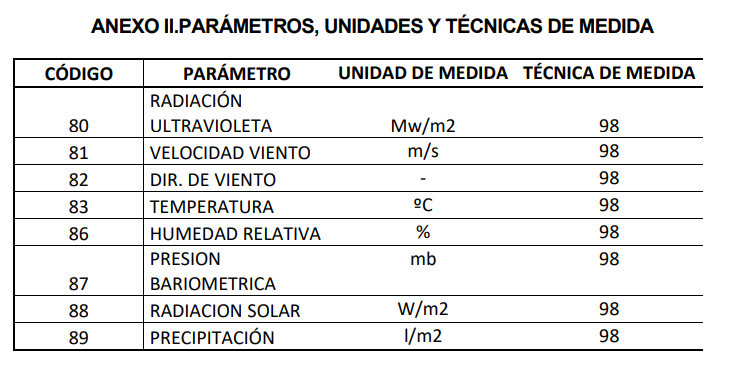

In [32]:
from IPython.display import display, Image
display(Image(filename='Images/Captura de pantalla 2023-11-16 162330.png'))

Eliminamos de la columna magnitud los siguientes códigos que no nos interesan en este momento:
1. **80 (Radiación Ultravioleta)**
2. **82 (Dirección del viento)**
3. **86 (Humedad Relativa)**
4. **87 (Presión Barométrica)**

In [31]:
mask_unwanted = weather_data_sep23[weather_data_sep23['MAGNITUD'].isin([80, 82, 86, 87])].index
weather_data_sep23.drop(index = mask_unwanted, inplace=True)
weather_data_sep23['MAGNITUD'].value_counts()

83    650
89    217
81    189
88    159
Name: MAGNITUD, dtype: int64

In [ ]:
mask_unwanted = weather_data_sep23['estado_meteorológico'] == 'Se desconoce'